<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. 

Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #FF8C00;">Libraries</h1>

In [15]:
# Insert your code 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

In [16]:
# Insert your code here


In [17]:
# Load the datasets
asset_info = pd.read_csv('asset_information_data.csv')
asset_prices = pd.read_csv('asset_price_data.csv')
portfolio_weights = pd.read_csv('portfolio_weights.csv')

# Inspect the data types and non-null values
print("\nAsset Information Info:")
asset_info.info()
print("\nAsset Prices Info:")
asset_prices.info()
print("\nPortfolio Weights Info:")
portfolio_weights.info()


Asset Information Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Family  5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes

Asset Prices Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    783 non-null    object 
 1   Asset1  770 non-null    float64
 2   Asset2  770 non-null    float64
 3   Asset3  770 non-null    float64
 4   Asset4  734 non-null    float64
 5   Asset5  763 non-null    float64
dtypes: float64(5), object(1)
memory usage: 36.8+ KB

Portfolio Weights Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date 

In [18]:
# Convert 'date' columns to datetime
asset_prices['date'] = pd.to_datetime(asset_prices['date'])
portfolio_weights['date'] = pd.to_datetime(portfolio_weights['date'])

# Melt the asset_prices and portfolio_weights dataframes
prices_long = pd.melt(asset_prices, id_vars='date', var_name='Name', value_name='price')
weights_long = pd.melt(portfolio_weights, id_vars='date', var_name='Name', value_name='weight')

# Merge the long-formatted dataframes
data = pd.merge(prices_long, weights_long, on=['date', 'Name'])

# Merge with asset information
data = pd.merge(data, asset_info, on='Name')

# Handle missing prices using forward fill
data['price'] = data.groupby('Name')['price'].ffill()

# Drop any remaining NaN values (if any at the beginning of the series)
data.dropna(inplace=True)


# Display the first few rows and info of the cleaned and merged dataframe
print("Cleaned and Merged Data Head:")
print(data.head())
print("\nCleaned and Merged Data Info:")
data.info()

# Save the cleaned data to a new CSV file
data.to_csv('cleaned_portfolio_data.csv', index=False)
data

Cleaned and Merged Data Head:
        date    Name     price    weight        Family
0 2019-01-02  Asset1  231.5061  0.225458  Fixed Income
1 2019-01-03  Asset1  231.0356  0.225458  Fixed Income
2 2019-01-04  Asset1  230.4026  0.225458  Fixed Income
3 2019-01-07  Asset1  230.0543  0.225458  Fixed Income
4 2019-01-08  Asset1  229.7012  0.225458  Fixed Income

Cleaned and Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3915 entries, 0 to 3914
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3915 non-null   datetime64[ns]
 1   Name    3915 non-null   object        
 2   price   3915 non-null   float64       
 3   weight  3915 non-null   float64       
 4   Family  3915 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 153.1+ KB


,date,Name,price,weight,Family
0,2019-01-02,Asset1,231.5061,0.225458,Fixed Income
1,2019-01-03,Asset1,231.0356,0.225458,Fixed Income
2,2019-01-04,Asset1,230.4026,0.225458,Fixed Income
3,2019-01-07,Asset1,230.0543,0.225458,Fixed Income
4,2019-01-08,Asset1,229.7012,0.225458,Fixed Income
...,...,...,...,...,...
3910,2021-12-27,Asset5,70.1100,0.158356,Alternative
3911,2021-12-28,Asset5,70.0300,0.158356,Alternative
3912,2021-12-29,Asset5,69.8100,0.158356,Alternative
3913,2021-12-30,Asset5,69.9100,0.158356,Alternative


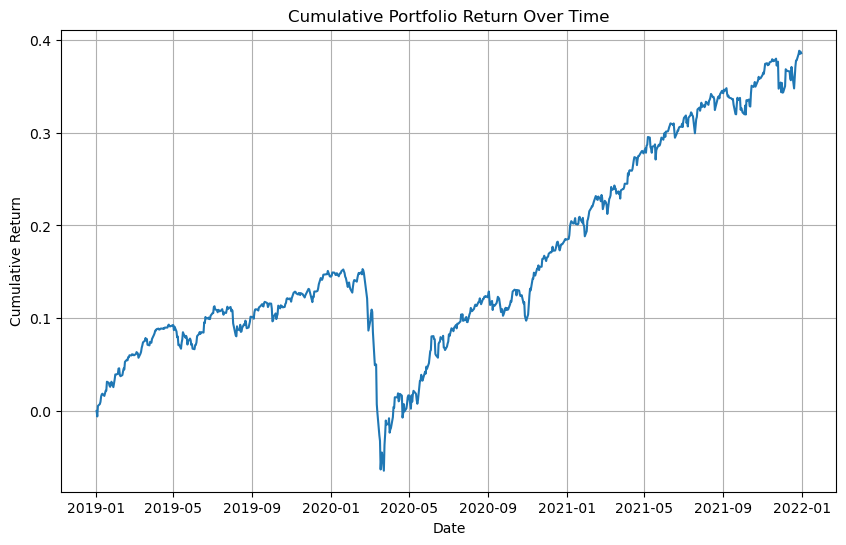

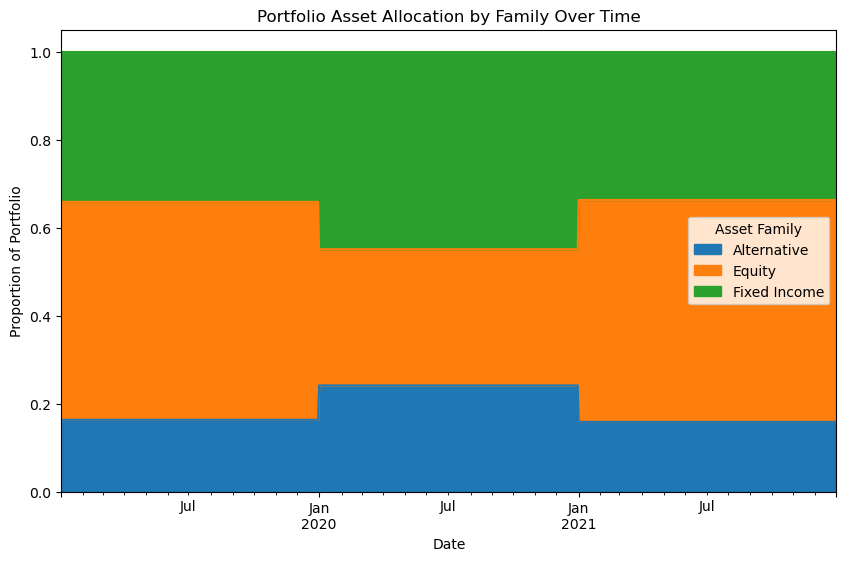

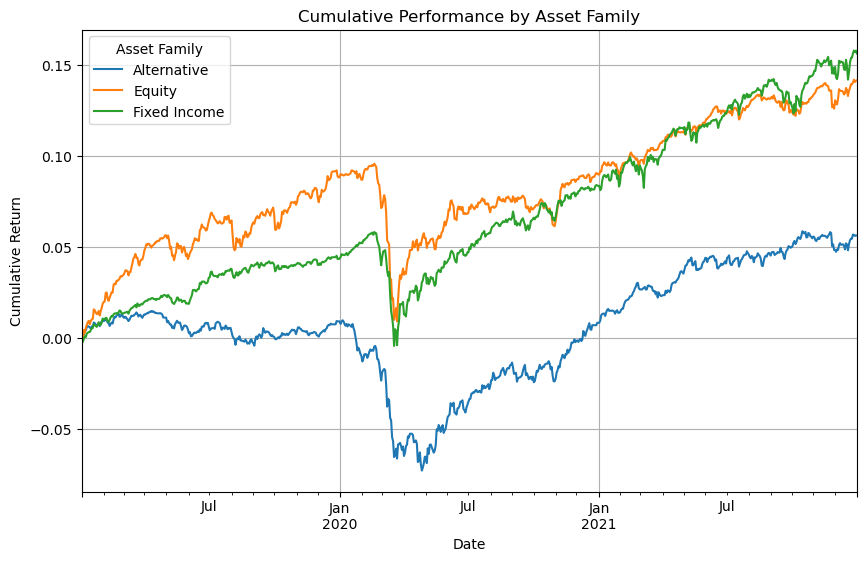

Analysis complete. The following charts have been generated:
- cumulative_portfolio_return.png
- asset_allocation_by_family.png
- family_performance.png


In [19]:




# Calculate the cumulative portfolio return
portfolio_return['cumulative_return'] = (1 + portfolio_return['portfolio_return']).cumprod() - 1

# Plot the cumulative portfolio return
pyplot.figure(figsize=(10, 6))
pyplot.plot(portfolio_return['date'], portfolio_return['cumulative_return'])
pyplot.title('Cumulative Portfolio Return Over Time')
pyplot.xlabel('Date')
pyplot.ylabel('Cumulative Return')
pyplot.grid(True)
pyplot.savefig('cumulative_portfolio_return.png')
pyplot.show()
pyplot.close()

# Analyze asset allocation by family
family_weights = data.groupby(['date', 'Family'])['weight'].sum().unstack()

# Plot the asset allocation over time
family_weights.plot(kind='area', stacked=True, figsize=(10, 6))
pyplot.title('Portfolio Asset Allocation by Family Over Time')
pyplot.xlabel('Date')
pyplot.ylabel('Proportion of Portfolio')
pyplot.legend(title='Asset Family')
pyplot.savefig('asset_allocation_by_family.png')
pyplot.show()
pyplot.close()

# Analyze the performance of each asset family
family_performance = data.groupby(['date', 'Family'])['contribution'].sum().unstack()
cumulative_family_performance = (1 + family_performance).cumprod() - 1

# Plot the cumulative performance of each asset family
cumulative_family_performance.plot(figsize=(10, 6))
pyplot.title('Cumulative Performance by Asset Family')
pyplot.xlabel('Date')
pyplot.ylabel('Cumulative Return')
pyplot.legend(title='Asset Family')
pyplot.grid(True)
pyplot.savefig('family_performance.png')
pyplot.show()
pyplot.close()

print("Analysis complete. The following charts have been generated:")
print("- cumulative_portfolio_return.png")
print("- asset_allocation_by_family.png")
print("- family_performance.png")

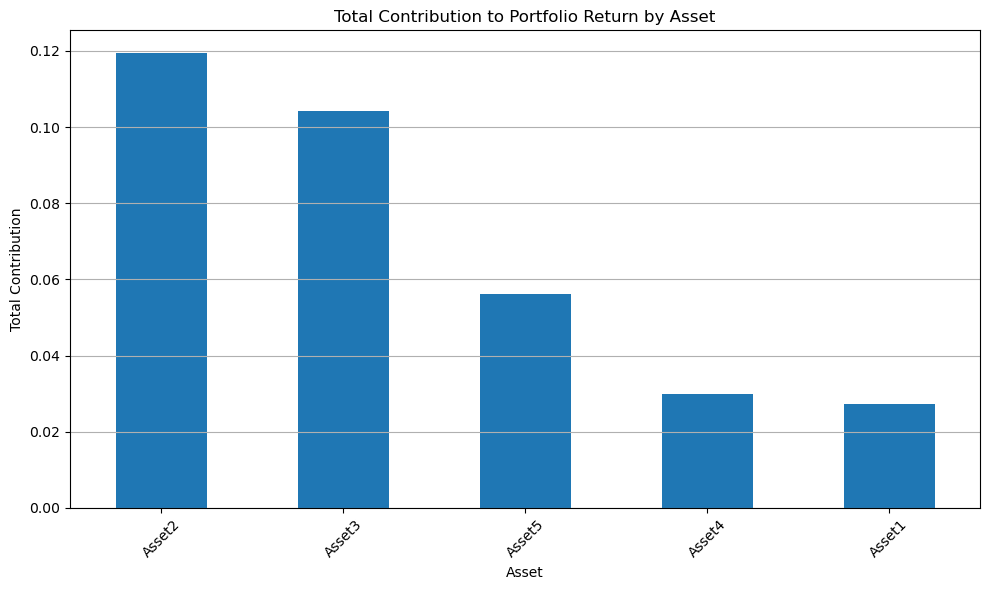

Further Portfolio Analysis:
------------------------------
Annualized Volatility: 8.36%
Sharpe Ratio: 1.24

Total Contribution by Asset:
Name
Asset2    0.119427
Asset3    0.104253
Asset5    0.056180
Asset4    0.029960
Asset1    0.027363
Name: contribution, dtype: float64
------------------------------

'asset_contribution.png' has been generated.


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data
data = pd.read_csv('cleaned_portfolio_data.csv', parse_dates=['date'])

# --- Perform calculations ---

# Calculate daily returns for each asset and portfolio
data['daily_return'] = data.groupby('Name')['price'].pct_change()
data['contribution'] = data['daily_return'] * data['weight']
portfolio_return = data.groupby('date')['contribution'].sum().reset_index(name='portfolio_return')

# Set a risk-free rate (annualized)
risk_free_rate = 0.0052  # Approximate average 3-month T-bill rate for 2019-2021

# Calculate annualized volatility
volatility = portfolio_return['portfolio_return'].std() * np.sqrt(252)

# Calculate annualized Sharpe Ratio
mean_daily_return = portfolio_return['portfolio_return'].mean()
sharpe_ratio = (mean_daily_return * 252 - risk_free_rate) / volatility

# Calculate total contribution of each asset
total_contribution = data.groupby('Name')['contribution'].sum().sort_values(ascending=False)

# --- Generate the contribution bar chart ---

plt.figure(figsize=(10, 6))
total_contribution.plot(kind='bar')
plt.title('Total Contribution to Portfolio Return by Asset')
plt.xlabel('Asset')
plt.ylabel('Total Contribution')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('asset_contribution.png')
plt.show()
plt.close()

# --- Print the results ---

print("Further Portfolio Analysis:")
print("-" * 30)
print(f"Annualized Volatility: {volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print("\nTotal Contribution by Asset:")
print(total_contribution)
print("-" * 30)
print("\n'asset_contribution.png' has been generated.")



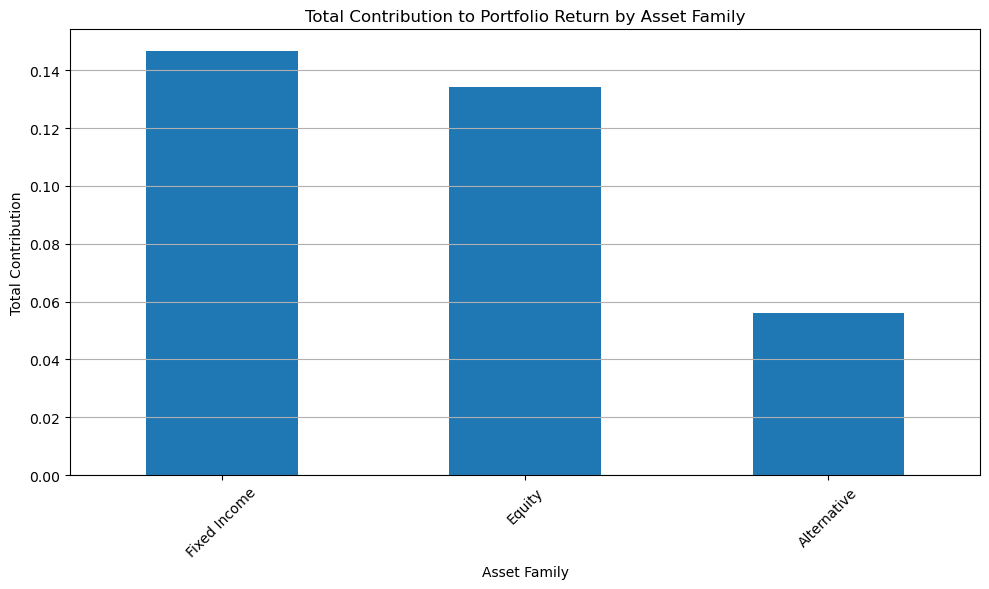

Further Portfolio Analysis:
------------------------------
Annualized Volatility: 8.36%
Sharpe Ratio: 1.24

Total Contribution by Asset Family:
Family
Fixed Income    0.146789
Equity          0.134213
Alternative     0.056180
Name: contribution, dtype: float64
------------------------------

'asset_family_contribution.png' has been generated with asset family names.


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data
data = pd.read_csv('cleaned_portfolio_data.csv', parse_dates=['date'])

# Provided asset mapping from your prompt
asset_family_map = {
    'Asset1': 'Fixed Income',
    'Asset2': 'Fixed Income',
    'Asset3': 'Equity',
    'Asset4': 'Equity',
    'Asset5': 'Alternative'
}

# Add a 'Family' column to the main data DataFrame
data['Family'] = data['Name'].map(asset_family_map)

# --- Perform calculations ---
data['daily_return'] = data.groupby('Name')['price'].pct_change()
data['contribution'] = data['daily_return'] * data['weight']
portfolio_return = data.groupby('date')['contribution'].sum().reset_index(name='portfolio_return')

# Set a risk-free rate (annualized)
risk_free_rate = 0.0052  # Approximate average 3-month T-bill rate for 2019-2021

# Calculate annualized volatility
volatility = portfolio_return['portfolio_return'].std() * np.sqrt(252)

# Calculate annualized Sharpe Ratio
mean_daily_return = portfolio_return['portfolio_return'].mean()
sharpe_ratio = (mean_daily_return * 252 - risk_free_rate) / volatility

# Calculate total contribution of each asset FAMILY (instead of individual assets)
total_contribution_by_family = data.groupby('Family')['contribution'].sum().sort_values(ascending=False)

# --- Generate the contribution bar chart ---
plt.figure(figsize=(10, 6))
total_contribution_by_family.plot(kind='bar')
plt.title('Total Contribution to Portfolio Return by Asset Family')
plt.xlabel('Asset Family')
plt.ylabel('Total Contribution')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('asset_family_contribution.png')
plt.show()
plt.close()

# --- Print the results ---
print("Further Portfolio Analysis:")
print("-" * 30)
print(f"Annualized Volatility: {volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print("\nTotal Contribution by Asset Family:")
print(total_contribution_by_family)
print("-" * 30)
print("\n'asset_family_contribution.png' has been generated with asset family names.")

In [23]:
#In summary, while your portfolio has some diversification benefits from Asset1, 
#the strong positive correlation between the other assets, especially Asset2 and Asset3, 
#suggests that this part of the portfolio is not as diversified.

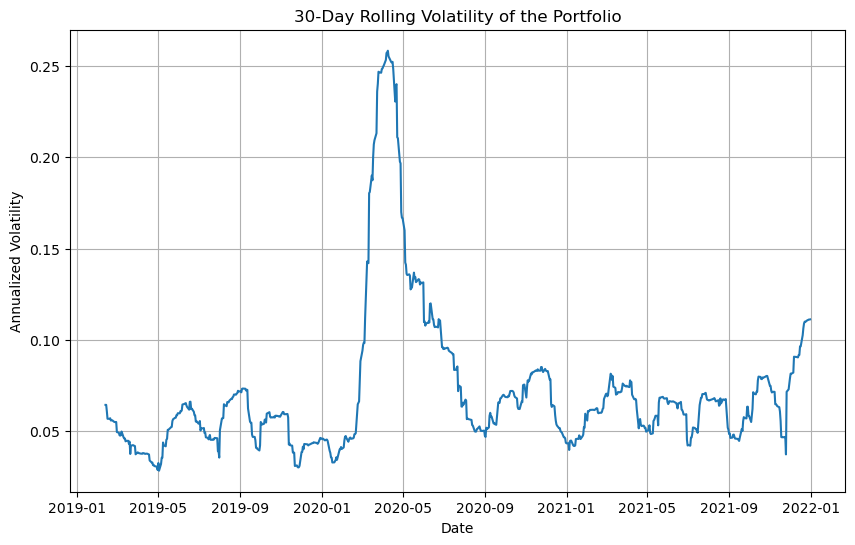

'rolling_volatility.png' has been generated.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the cleaned data
data = pd.read_csv('cleaned_portfolio_data.csv', parse_dates=['date'])

# --- Perform calculations ---

# Calculate daily returns for each asset
data['daily_return'] = data.groupby('Name')['price'].pct_change()

# Calculate the contribution of each asset to the portfolio return
data['contribution'] = data['daily_return'] * data['weight']

# Calculate the daily portfolio return by summing the contributions of all assets for each day
portfolio_return = data.groupby('date')['contribution'].sum().reset_index(name='portfolio_return')

# Calculate the 30-day rolling volatility
portfolio_return['rolling_volatility'] = portfolio_return['portfolio_return'].rolling(window=30).std() * np.sqrt(252)

# --- Generate the rolling volatility plot ---

plt.figure(figsize=(10, 6))
plt.plot(portfolio_return['date'], portfolio_return['rolling_volatility'])
plt.title('30-Day Rolling Volatility of the Portfolio')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.grid(True)
plt.savefig('rolling_volatility.png')
plt.show()
plt.close()

# --- Print a confirmation message ---

print("'rolling_volatility.png' has been generated.")

In [25]:
#Periods of High Volatility: You can observe a significant spike in volatility in early 2020. 
#This corresponds to the market turbulence caused by the onset of the COVID-19 pandemic. 
#There is also a smaller spike in late 2021.

#Periods of Low Volatility: The portfolio experienced periods of relatively low and stable volatility throughout 2019 
# and for parts of 2021.

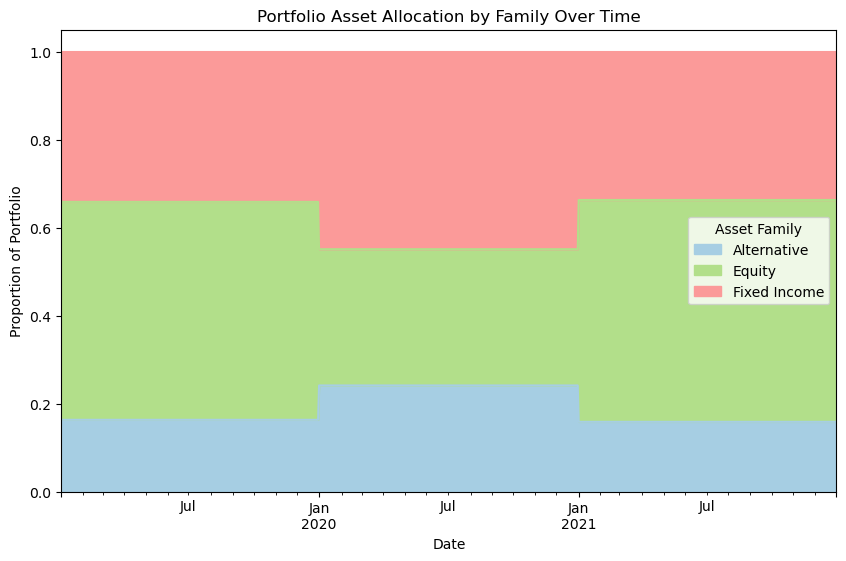

In [26]:
# Analyze asset allocation by family


# Analyze asset allocation by family
family_weights = data.groupby(['date', 'Family'])['weight'].sum().unstack()

# Define a soft pastel color palette
soft_colors = [
    "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6",
    "#ffff99", "#1f78b4", "#33a02c"
]

# Plot the asset allocation over time
family_weights.plot(
    kind='area', 
    stacked=True, 
    figsize=(10, 6), 
    color=soft_colors[:len(family_weights.columns)]
)
plt.title('Portfolio Asset Allocation by Family Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion of Portfolio')
plt.legend(title='Asset Family')
plt.savefig('asset_allocation_by_family.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()



<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>

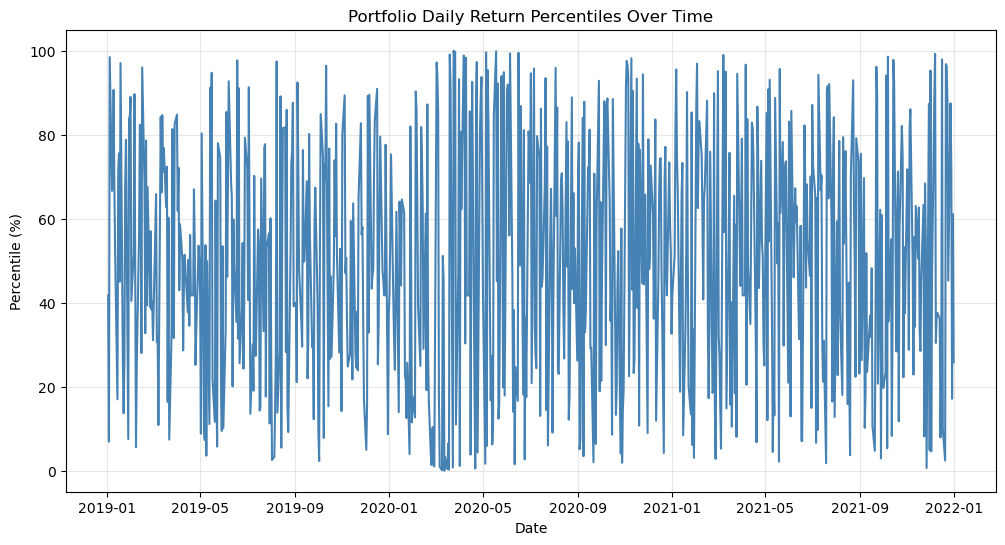

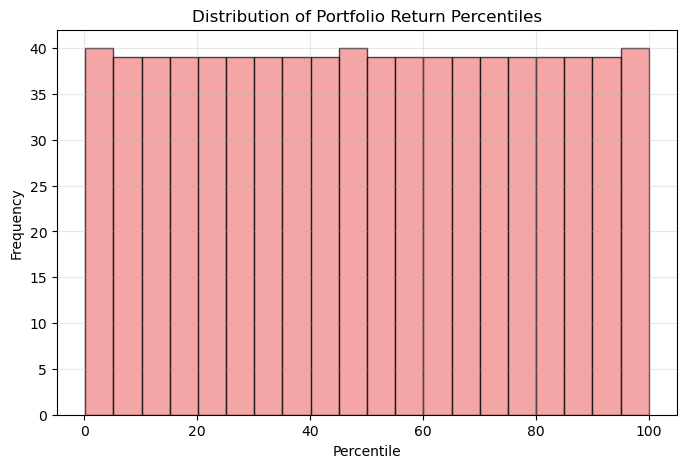

In [33]:
# Daily percentage returns
import pandas as pd
import matplotlib.pyplot as plt

# 1. Calculate daily returns for each asset
data['daily_return'] = data.groupby('Name')['price'].pct_change()

# 2. Contribution of each asset to the portfolio
data['contribution'] = data['daily_return'] * data['weight']

# 3. Aggregate to get portfolio daily return
portfolio_return = data.groupby('date')['contribution'].sum().reset_index(name='portfolio_return')

# 4. Convert portfolio returns to percentiles
portfolio_return['percentile'] = portfolio_return['portfolio_return'].rank(pct=True) * 100

# 5. Visualize percentile over time
plt.figure(figsize=(12,6))
plt.plot(portfolio_return['date'], portfolio_return['percentile'], color='steelblue')
plt.title("Portfolio Daily Return Percentiles Over Time")
plt.xlabel("Date")
plt.ylabel("Percentile (%)")
plt.grid(alpha=0.3)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Calculate daily returns for each asset
data['daily_return'] = data.groupby('Name')['price'].pct_change()

# 2. Rank daily returns within each asset (percentile rank)
data['percentile'] = data.groupby('Name')['daily_return'] \
                         .rank(pct=True) * 100

# 3. Plot percentile over time for each asset
plt.figure(figsize=(12, 6))

for name, df in data.groupby('Name'):
    plt.plot(df['date'], df['percentile'], label=name)

plt.title("Asset Daily Return Percentiles Over Time")
plt.xlabel("Date")
plt.ylabel("Percentile (%)")
plt.legend(title="Asset")
plt.grid(alpha=0.3)
plt.show()


<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>

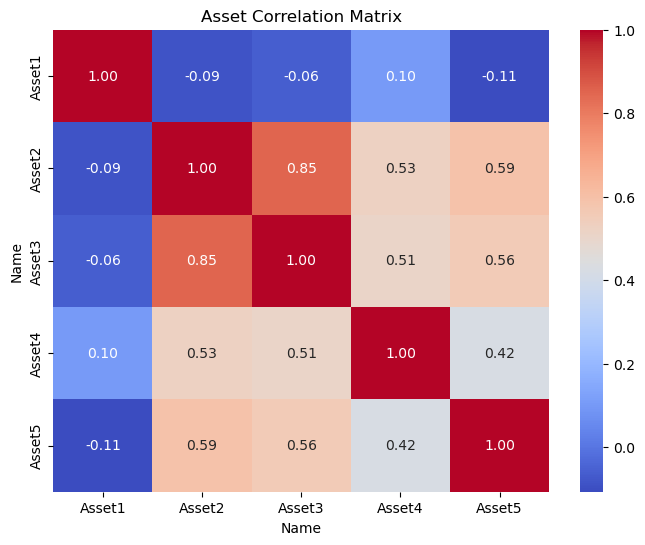

Correlation Matrix:
Name      Asset1    Asset2    Asset3    Asset4    Asset5
Name                                                    
Asset1  1.000000 -0.088341 -0.061253  0.102252 -0.106484
Asset2 -0.088341  1.000000  0.852491  0.526634  0.591399
Asset3 -0.061253  0.852491  1.000000  0.511550  0.557414
Asset4  0.102252  0.526634  0.511550  1.000000  0.421155
Asset5 -0.106484  0.591399  0.557414  0.421155  1.000000

'correlation_matrix.png' has been generated.


In [34]:
# Insert your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data
data = pd.read_csv('cleaned_portfolio_data.csv', parse_dates=['date'])

# --- Correlation Analysis ---

# Calculate daily returns for each asset
data['daily_return'] = data.groupby('Name')['price'].pct_change()

# Pivot the data to get daily returns for each asset in a separate column
daily_returns_wide = data.pivot(index='date', columns='Name', values='daily_return')

# Calculate the correlation matrix
correlation_matrix = daily_returns_wide.corr()

# --- Visualize the correlation matrix ---

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Asset Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()
plt.close()

# --- Print the results ---

print("Correlation Matrix:")
print(correlation_matrix)
print("\n'correlation_matrix.png' has been generated.")

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>

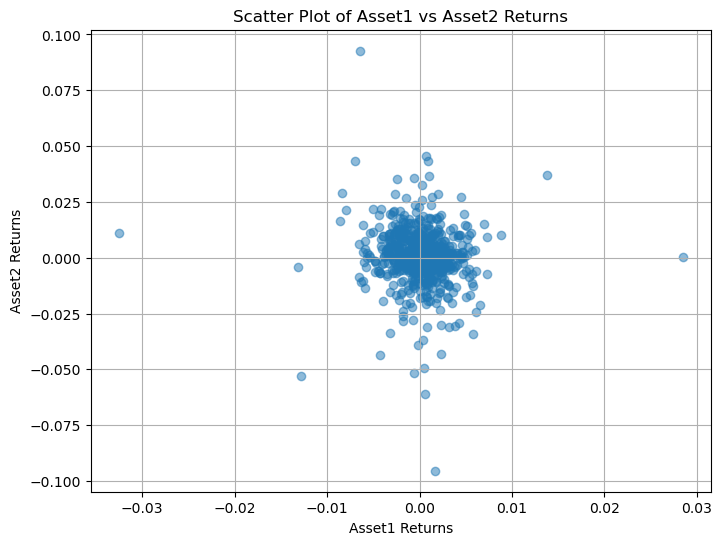

In [41]:
# Insert your code here
# Scatter plot for two specific assets (adjust names as per dataset)
# Pivot to wide format (prices by asset)
price_data = data.pivot(index="date", columns="Name", values="price")
price_data.index = pd.to_datetime(price_data.index)
price_data = price_data.sort_index()

# Compute daily returns
returns = price_data.pct_change().dropna()

# Scatter plot between Asset1 and Asset2 returns
plt.figure(figsize=(8,6))
plt.scatter(returns["Asset1"], returns["Asset2"], alpha=0.5)
plt.xlabel("Asset1 Returns")
plt.ylabel("Asset2 Returns")
plt.title("Scatter Plot of Asset1 vs Asset2 Returns")
plt.grid(True)
plt.savefig("Scatter Plot of Asset1 vs Asset2 Returns")
plt.show()



<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>

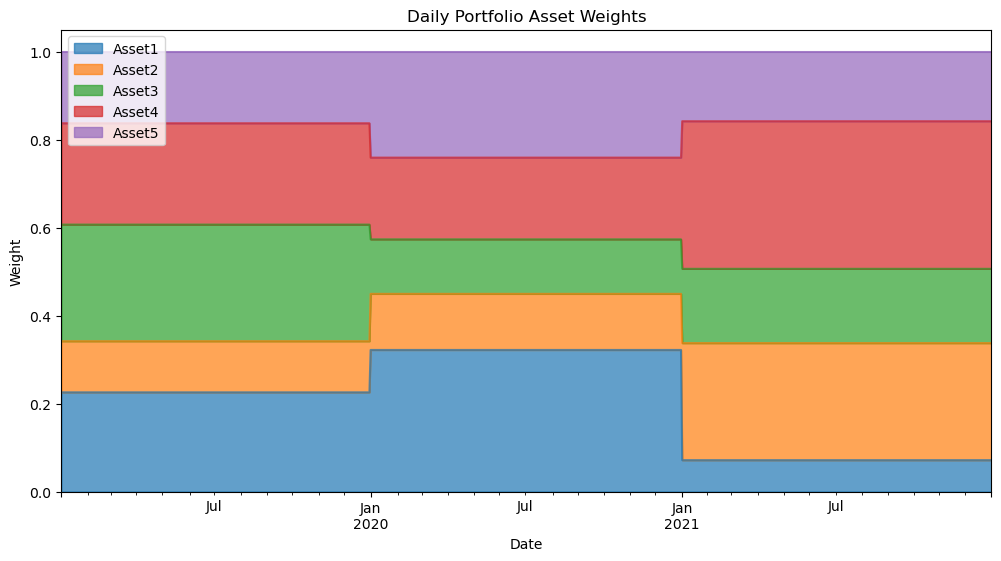

In [59]:
# Insert your code here
weights = pd.read_csv("portfolio_weights.csv", parse_dates=["date"]).set_index("date").sort_index()
asset_info = pd.read_csv("asset_information_data.csv")  # contains Asset, Category columns

# Area chart of asset weights ---
weights.plot.area(figsize=(12,6), alpha=0.7)
plt.title("Daily Portfolio Asset Weights")
plt.ylabel("Weight")
plt.xlabel("Date")
plt.legend(loc="upper left")
plt.savefig("Daily Portfolio Asset Weights")
plt.show()


<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>

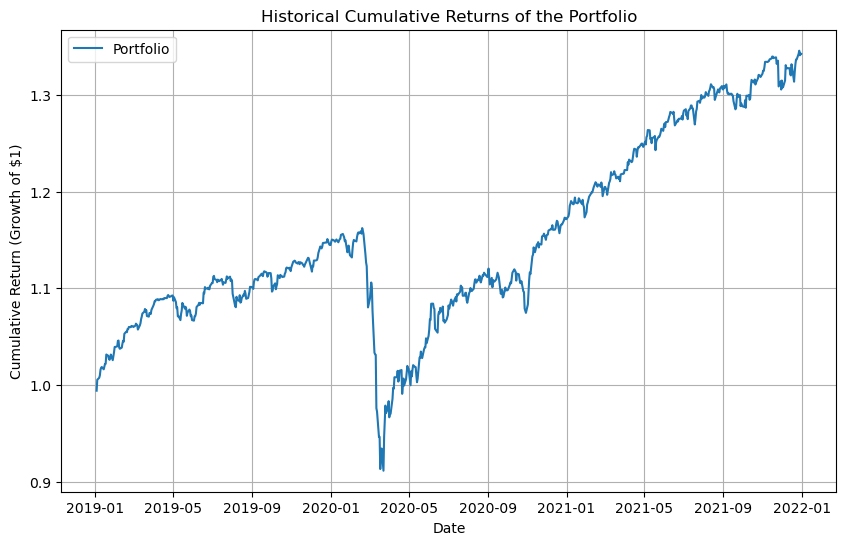

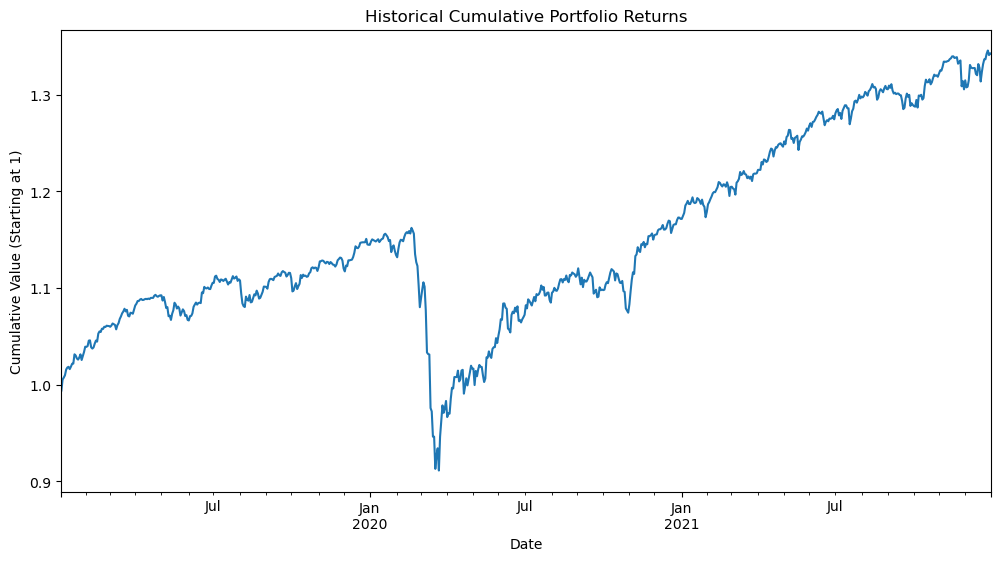

In [43]:
# Insert your code here

# Pivot prices into wide format
price_data = data.pivot(index="date", columns="Name", values="price")
price_data.index = pd.to_datetime(price_data.index)
price_data = price_data.sort_index()

# Get weights for each asset (assuming weights are constant across time)
weights = data.groupby("Name")["weight"].first()

# Compute daily returns
returns = price_data.pct_change().dropna()

# Compute portfolio daily returns
portfolio_returns = (returns * weights).sum(axis=1)

# Compute cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()

# Plot cumulative returns
plt.figure(figsize=(10,6))
plt.plot(cumulative_returns, label="Portfolio")
plt.title("Historical Cumulative Returns of the Portfolio")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Growth of $1)")
plt.legend()
plt.grid(True)
plt.show()

# Portfolio cumulative returns ---
# Multiply daily returns by weights row-wise
portfolio_returns = (returns * weights).sum(axis=1)

cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.plot(figsize=(12,6))
plt.title("Historical Cumulative Portfolio Returns")
plt.ylabel("Cumulative Value (Starting at 1)")
plt.xlabel("Date")
plt.savefig("Historical Cumulative Portfolio Returns")
plt.show()

<h2 style="color: #FF6347;">Annualized Return.</h2>

Annualized Return of the Portfolio: 10.83%


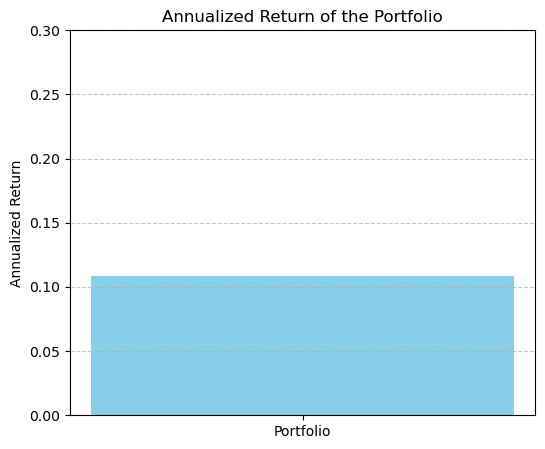

In [45]:
# Insert your code here
# Annualized return 
# Annualization factor
trading_days = 261  

# Annualized return
annualized_return = (1 + portfolio_returns.mean())**trading_days - 1
print("Annualized Return of the Portfolio: {:.2%}".format(annualized_return))

# Plot as bar chart
plt.figure(figsize=(6,5))
plt.bar(["Portfolio"], [annualized_return], color="skyblue")
plt.title("Annualized Return of the Portfolio")
plt.ylabel("Annualized Return")
plt.ylim(0, max(0.3, annualized_return*1.2))  # scale y-axis dynamically
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


<h2 style="color: #FF6347;">Annualized Volatility.</h2>

In [36]:
# Insert your code here
# Annualized volatility

risk_free_rate = 0.0052  

# Calculate annualized volatility
volatility = portfolio_return['portfolio_return'].std() * np.sqrt(252)

# Calculate annualized Sharpe Ratio
mean_daily_return = portfolio_return['portfolio_return'].mean()
sharpe_ratio = (mean_daily_return * 252 - risk_free_rate) / volatility

print("-" * 30)
print(f"Annualized Volatility: {volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

------------------------------
Annualized Volatility: 8.36%
Sharpe Ratio: 1.24


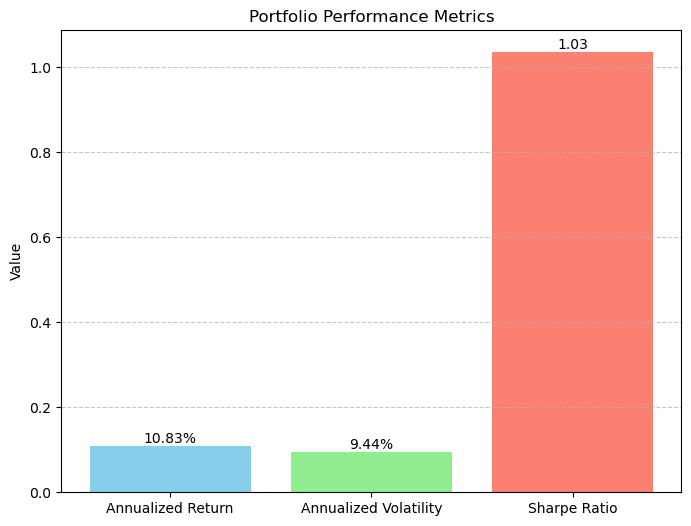

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# --- Inputs ---
risk_free_rate = 0.0052  
trading_days = 261   # as per your earlier note

# Annualized volatility
volatility = portfolio_returns.std() * np.sqrt(trading_days)

# Annualized return
annualized_return = (1 + portfolio_returns.mean())**trading_days - 1

# Sharpe ratio
mean_daily_return = portfolio_returns.mean()
sharpe_ratio = (mean_daily_return * trading_days - risk_free_rate) / volatility

# --- Visualization ---
metrics = ["Annualized Return", "Annualized Volatility", "Sharpe Ratio"]
values = [annualized_return, volatility, sharpe_ratio]

plt.figure(figsize=(8,6))
bars = plt.bar(metrics, values, color=["skyblue", "lightgreen", "salmon"])

# Annotate values on bars (percentage for return & volatility, plain for Sharpe)
for metric, bar in zip(metrics, bars):
    height = bar.get_height()
    if "Sharpe" in metric:
        label = f"{height:.2f}"
    else:
        label = f"{height:.2%}"  # convert to percentage
    plt.text(bar.get_x() + bar.get_width()/2, height, label,
             ha='center', va='bottom', fontsize=10)

plt.title("Portfolio Performance Metrics")
plt.ylabel("Value")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("Portfolio Performance Metrics")
plt.show()


<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>

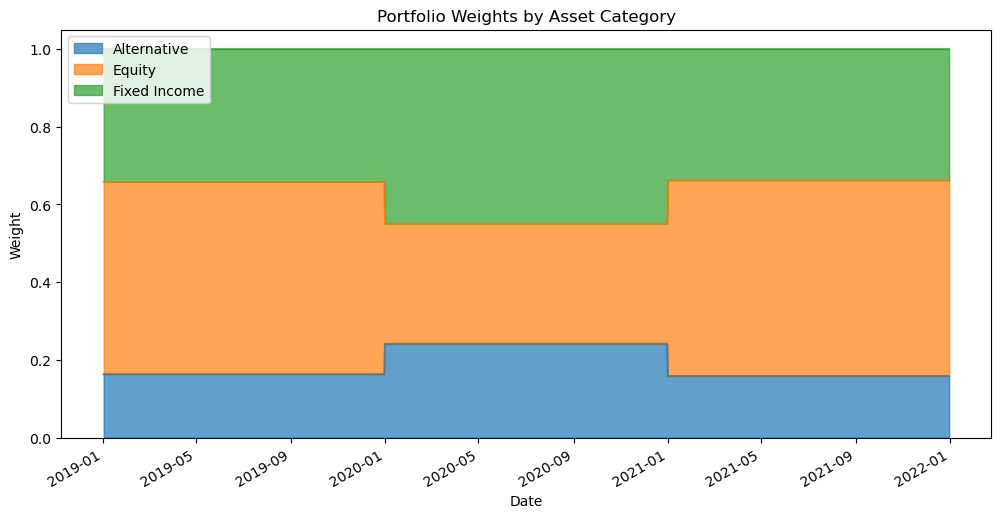

In [58]:
# Insert your code here
# Reset index so 'Asset' becomes a column
weights_T = weights.T.reset_index().rename(columns={"index": "Asset"})

# Merge with asset information
weights_with_cat = weights_T.merge(asset_info, left_on="Asset", right_on="Name")

# Rename 'Family' to 'Category' for clarity
weights_with_cat = weights_with_cat.rename(columns={"Family": "Category"})

# Drop original 'Name' column
weights_with_cat = weights_with_cat.drop(columns=["Name"])

# Select only the Asset, Category and numeric columns (dates)
# This ensures we're only working with numeric data for the groupby sum
numeric_cols = weights_with_cat.select_dtypes(include=['number']).columns
plot_data = weights_with_cat[['Category'] + list(numeric_cols)]

# Group by Category and sum weights for each date
category_weights = plot_data.groupby("Category").sum()

# Plot area chart
category_weights.T.plot.area(figsize=(12,6), alpha=0.7)  # Transpose here for dates on x-axis
plt.title("Portfolio Weights by Asset Category")
plt.ylabel("Weight")
plt.xlabel("Date")
plt.legend(loc="upper left")
plt.savefig("Portfolio Weights by Asset Category")
plt.show()